                              Medical Cost Personal Insurance Project

Project Description

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .

Columns:     

•	age: age of primary beneficiary
•	sex: insurance contractor gender, female, male
•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,     objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.
•	children: Number of children covered by health insurance / Number of dependents
•	smoker: Smoking
•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
•	charges: Individual medical costs billed by health insurance


Predict : Can you accurately predict insurance costs?

 Importing Important Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#Uploading the dataset

In [3]:
health_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')

Checking our first five details from the data set:

In [11]:
health_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Lets check the shape of our data set:(Number of rows and coloumns)

In [16]:
health_data.shape

(1338, 7)

Checking the type of our data set:

In [17]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


 Checking null or missing values in our data set:

In [18]:
health_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Lets check statisical details about our data set:

In [19]:
health_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#distribution  of age value

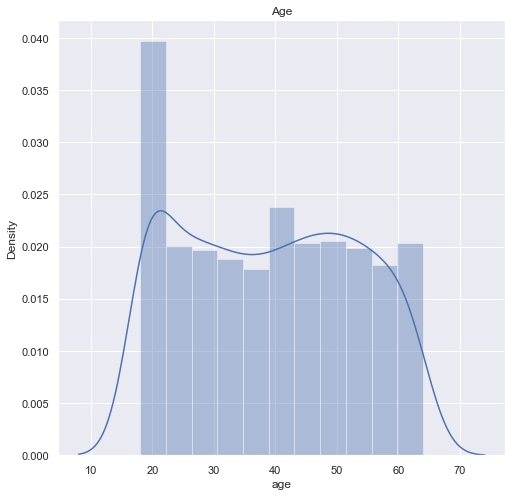

In [4]:
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(health_data['age'])# distplot tells us the distribution of the dataset throghtout
plt.title('Age')
plt.show()

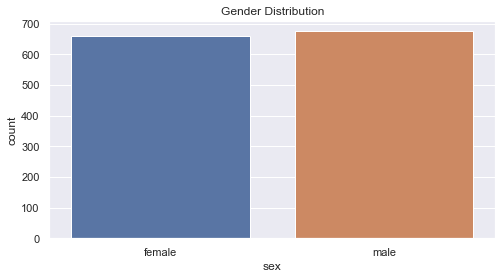

In [35]:

plt.figure(figsize=(8,4))
sns.countplot(x='sex',data=health_data)
plt.title('Gender Distribution')
plt.show()

#bmi distribution( body mass index)

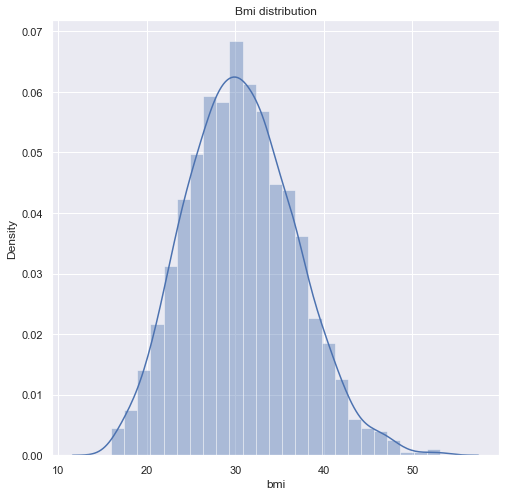

In [42]:

plt.figure(figsize=(8,8))
sns.distplot(health_data['bmi'])# distplot tells us the distribution of the dataset throghtout
plt.title('Bmi distribution')
plt.show()

we can use countplot for children column 

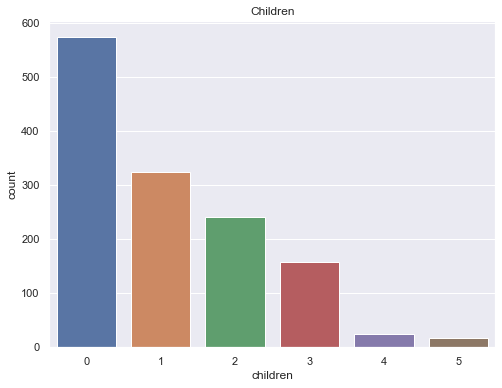

In [5]:

plt.figure(figsize=(8,6))
sns.countplot(x='children',data=health_data)
plt.title('Children')
plt.show()

Lets check the unquie value count in children categary

In [43]:
health_data['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

We have category from people have no childern is maximum and very less people who have the five children.

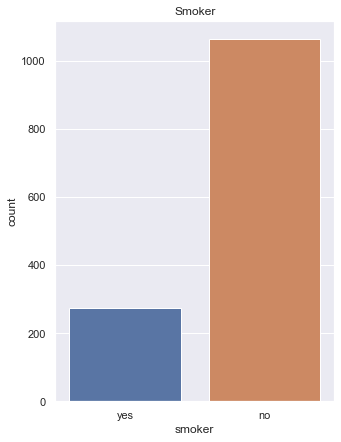

In [6]:
sns.set()
plt.figure(figsize=(5,7))
sns.countplot(health_data['smoker'])
plt.title('Smoker')
plt.show()

In [46]:
health_data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Mostly customers are non smokers in our data set.

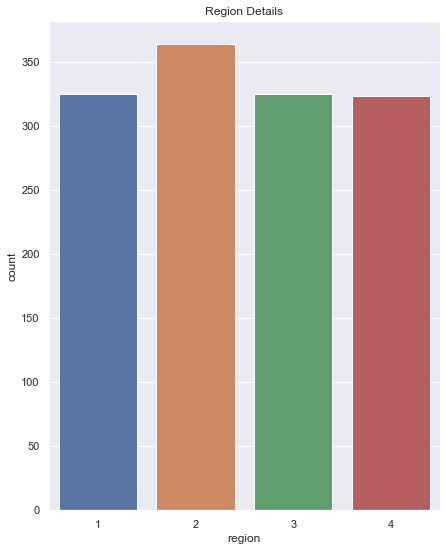

In [14]:
plt.figure(figsize=(7,9))
sns.countplot(x='region',data=health_data)
plt.title('Region Details')
plt.show()

In [51]:
health_data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

We have four magar regions in our data set and southeast region has slighly higher number of insured consumers.

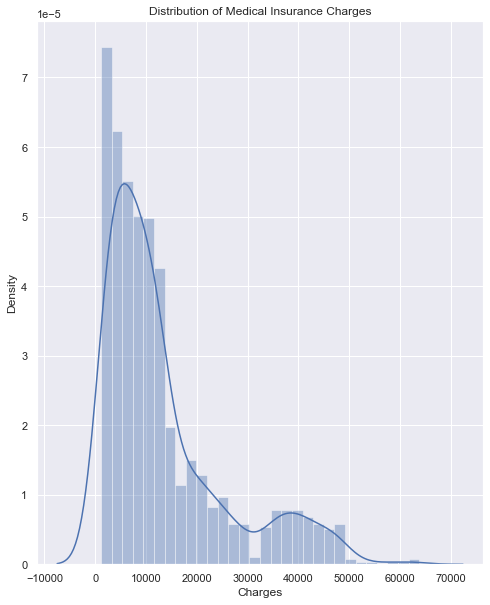

In [13]:
plt.figure(figsize=(8, 10))
sns.distplot(health_data['charges'])
plt.title('Distribution of Medical Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Checking our numerical data and catogorical data. 

Catogorical data: Sex, smoker and region and rest our numerical data.


#Lets encode our catogorical data

Lets map the variables with 2 levels to 0 and 1

Encoding the sex,smoker and region coloumn:

In [79]:
health_data.replace({'sex':{'male':0,'female':1}},inplace=True)

In [80]:
health_data.replace({'smoker': {'yes': 1, 'no': 0}}, inplace=True)


In [87]:
health_data.replace({'region':{'southwest':'1','southeast':'2','northwest':'3','northeast':'4'}},inplace=True)

In [89]:
health_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,no,1,16884.92400
1,18,0,33.770,1,no,2,1725.55230
2,28,0,33.000,3,no,2,4449.46200
3,33,0,22.705,0,no,3,21984.47061
4,32,0,28.880,0,no,3,3866.85520


Splitting the Data

In [10]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Split the Data: Split data into training and testing sets. This allows to evaluate the performance of your linear regression model on unseen data.

In [44]:
X = health_data.drop(['charges', 'region'], axis=1)  # Input features
y = health_data['charges']  # Target variable

In [45]:
X

,age,sex,bmi,children,smoker
0,19,1,27.900,0,0
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0
...,...,...,...,...,...
1333,50,0,30.970,3,0
1334,18,1,31.920,0,0
1335,18,1,36.850,0,0
1336,21,1,25.800,0,0


In [46]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Split the Data: Split data into training and testing sets. This allows to evaluate the performance of your linear regression model on unseen data.


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Create and Train the Model: Create an instance of the LinearRegression model

In [ ]:
Linear Regression Model

In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Making predictions on the train data

In [49]:
y_pred = model.predict(X_train)

Evaluate the model

In [50]:
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

In [51]:
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 128030744.25697869
R-squared Score: 0.11295273726117849


Making predictions on the test data

In [53]:
y_pred = model.predict(X_test)

In [54]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [36]:
print("Mean Squared Error (MSE):", mse)
print("R-squared Score:", r2)

Mean Squared Error (MSE): 130515098.1369609
R-squared Score: 0.15931617036190215


In [63]:
input_insurance = (62, 1, 26.29, 0, 0, )

# Convert input data into a numpy array and reshape it
input_insurance_reshaped = np.array(input_insurance).reshape(1, -1)

# Make predictions using the trained model
prediction = model.predict(input_insurance_reshaped)

print(prediction)


[15650.50720439]
